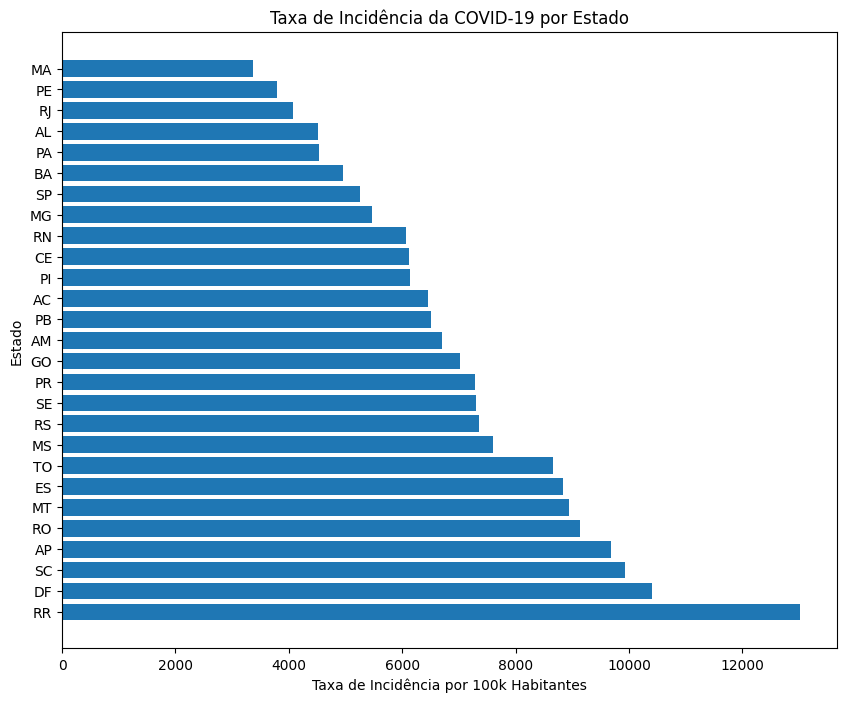

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregando os dados
df = pd.read_csv('caso_full.csv')

# Agrupando por estado e somando os casos confirmados e a população estimada
state_data = df.groupby('state').agg({
    'last_available_confirmed': 'sum',
    'estimated_population': 'sum'
}).reset_index()

# Calculando a taxa de incidência por 100k habitantes
state_data['incidence_rate'] = state_data['last_available_confirmed'] / state_data['estimated_population'] * 100000

# Ordenando os dados pela taxa de incidência
state_data = state_data.sort_values('incidence_rate', ascending=False)

# Plotando o gráfico de barras
plt.figure(figsize=(10, 8))
plt.barh(state_data['state'], state_data['incidence_rate'])
plt.xlabel('Taxa de Incidência por 100k Habitantes')
plt.ylabel('Estado')
plt.title('Taxa de Incidência da COVID-19 por Estado')
plt.show()

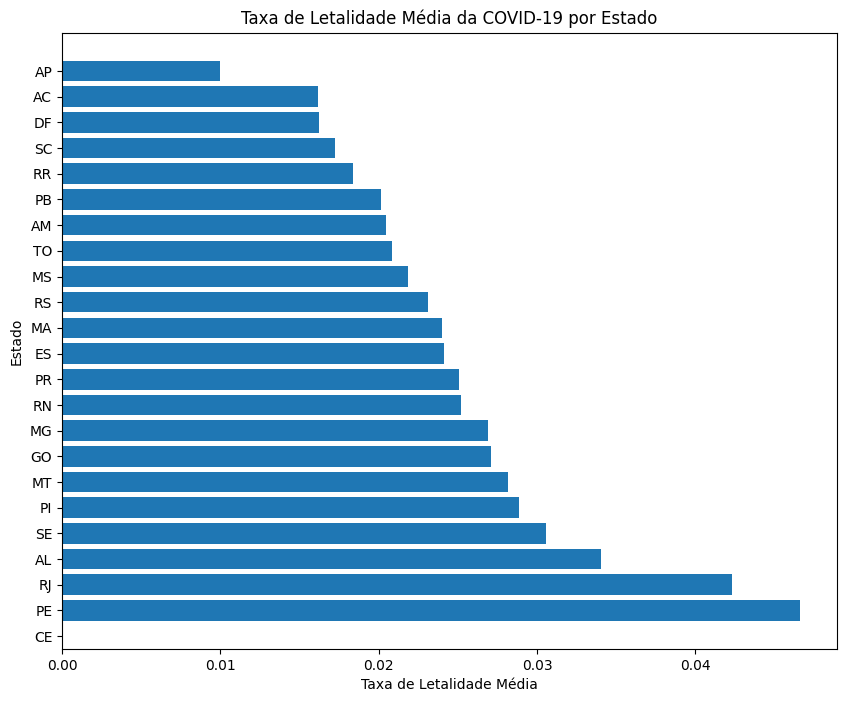

In [11]:
# Calculando a taxa de letalidade por estado ou cidade
df['letalidade'] = df['last_available_deaths'] / df['last_available_confirmed']

# Agrupando por estado para obter a média da taxa de letalidade
letalidade_estado = df.groupby('state')['letalidade'].mean().reset_index()

# Ordenando os resultados
letalidade_estado_sorted = letalidade_estado.sort_values('letalidade', ascending=False)

# Plotando
plt.figure(figsize=(10, 8))
plt.barh(letalidade_estado_sorted['state'], letalidade_estado_sorted['letalidade'])
plt.xlabel('Taxa de Letalidade Média')
plt.ylabel('Estado')
plt.title('Taxa de Letalidade Média da COVID-19 por Estado')
plt.show()


C:\Users\gabri\AppData\Local\Temp\ipykernel_21404\3591231826.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_estado['date'] = pd.to_datetime(dados_estado['date'])
C:\Users\gabri\AppData\Local\Temp\ipykernel_21404\3591231826.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_estado.sort_values('date', inplace=True)


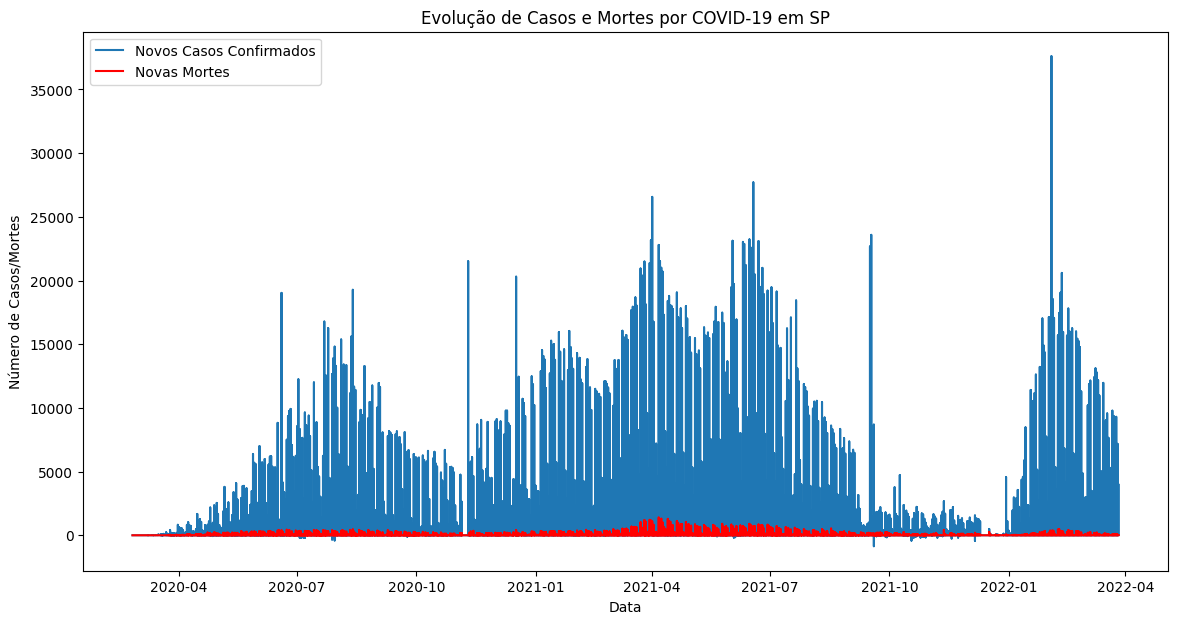

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregando os dados
df = pd.read_csv('caso_full.csv')

# Escolha um estado ou cidade para análise
estado_especifico = 'SP'  # Substitua por seu estado ou cidade de interesse

# Filtrando os dados pelo estado ou cidade escolhido
dados_estado = df[df['state'] == estado_especifico]

# Convertendo a coluna de data e ordenando
dados_estado['date'] = pd.to_datetime(dados_estado['date'])
dados_estado.sort_values('date', inplace=True)

# Plotando novos casos confirmados e novas mortes ao longo do tempo
plt.figure(figsize=(14, 7))
plt.plot(dados_estado['date'], dados_estado['new_confirmed'], label='Novos Casos Confirmados')
plt.plot(dados_estado['date'], dados_estado['new_deaths'], label='Novas Mortes', color='red')
plt.title(f'Evolução de Casos e Mortes por COVID-19 em {estado_especifico}')
plt.xlabel('Data')
plt.ylabel('Número de Casos/Mortes')
plt.legend()
plt.show()


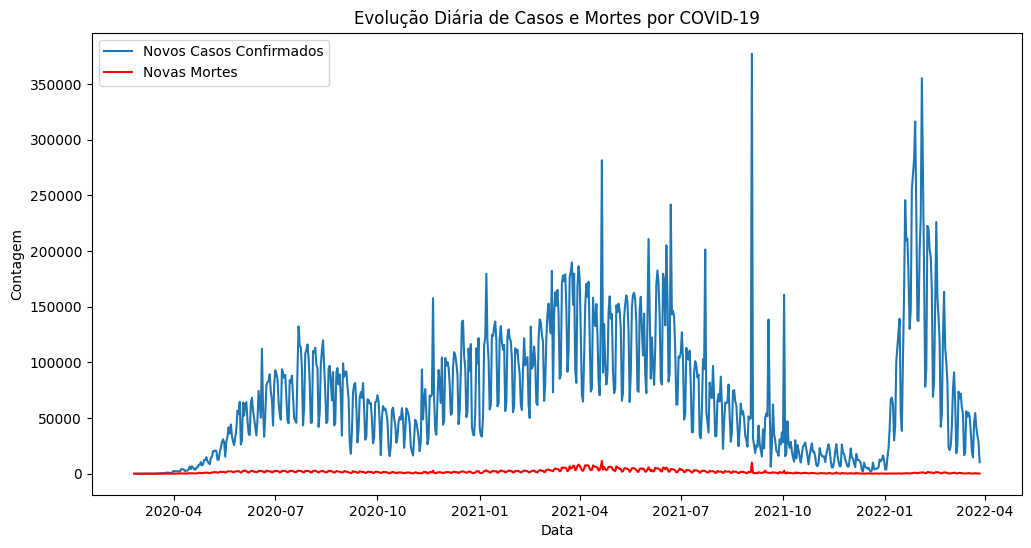

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregando os dados
df = pd.read_csv('caso_full.csv')

# Convertendo a coluna de data para datetime
df['date'] = pd.to_datetime(df['date'])

# Agrupando dados por data e somando novos casos e mortes
daily_summary = df.groupby('date').agg({
    'new_confirmed': 'sum',
    'new_deaths': 'sum'
}).reset_index()

# Plotando a evolução de novos casos e mortes
plt.figure(figsize=(12, 6))
plt.plot(daily_summary['date'], daily_summary['new_confirmed'], label='Novos Casos Confirmados')
plt.plot(daily_summary['date'], daily_summary['new_deaths'], label='Novas Mortes', color='red')
plt.xlabel('Data')
plt.ylabel('Contagem')
plt.title('Evolução Diária de Casos e Mortes por COVID-19')
plt.legend()
plt.show()

In [ ]:
#################################################################SEGUNDO BANCO DE DADOS#################################################################

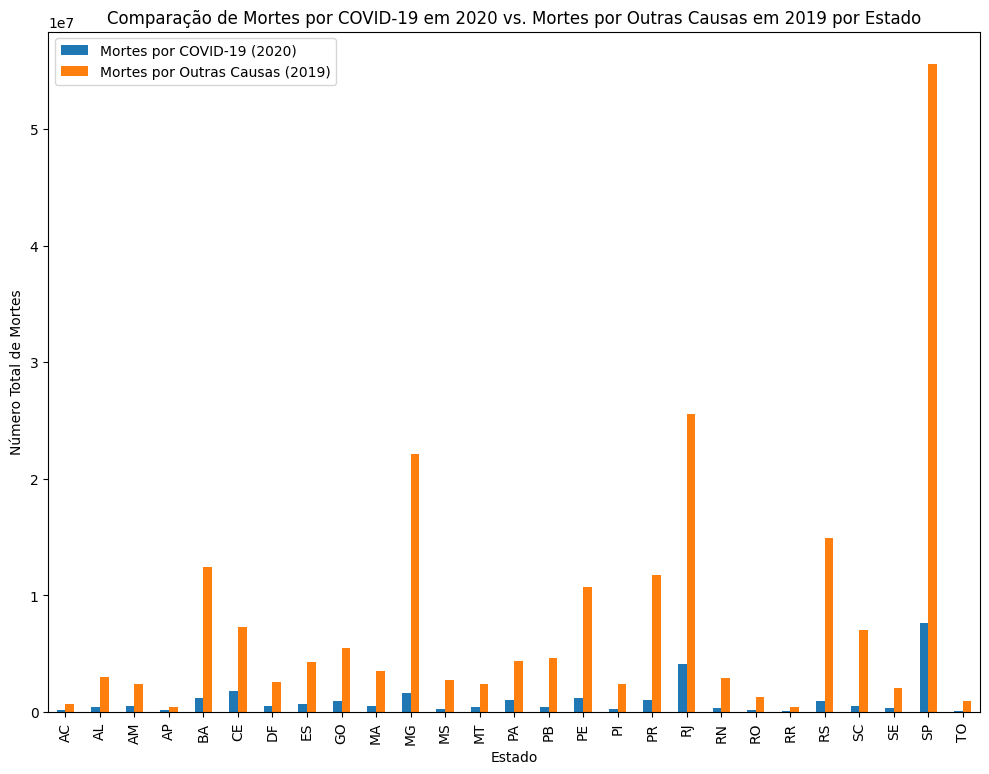

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregando os dados
df_2020 = pd.read_csv('obito_cartorio.csv')

# Sumarizando as mortes por COVID-19 em 2020 e outras mortes em 2019 por estado
death_summary = df_2020.groupby('state').agg({
    'deaths_covid19': 'sum',
    'deaths_total_2019': 'sum'
}).reset_index()

# Plotando o gráfico de comparação
death_summary.plot(x='state', y=['deaths_covid19', 'deaths_total_2019'], kind='bar', figsize=(10, 8))
plt.title('Comparação de Mortes por COVID-19 em 2020 vs. Mortes por Outras Causas em 2019 por Estado')
plt.xlabel('Estado')
plt.ylabel('Número Total de Mortes')
plt.legend(['Mortes por COVID-19 (2020)', 'Mortes por Outras Causas (2019)'])
plt.tight_layout()
plt.show()

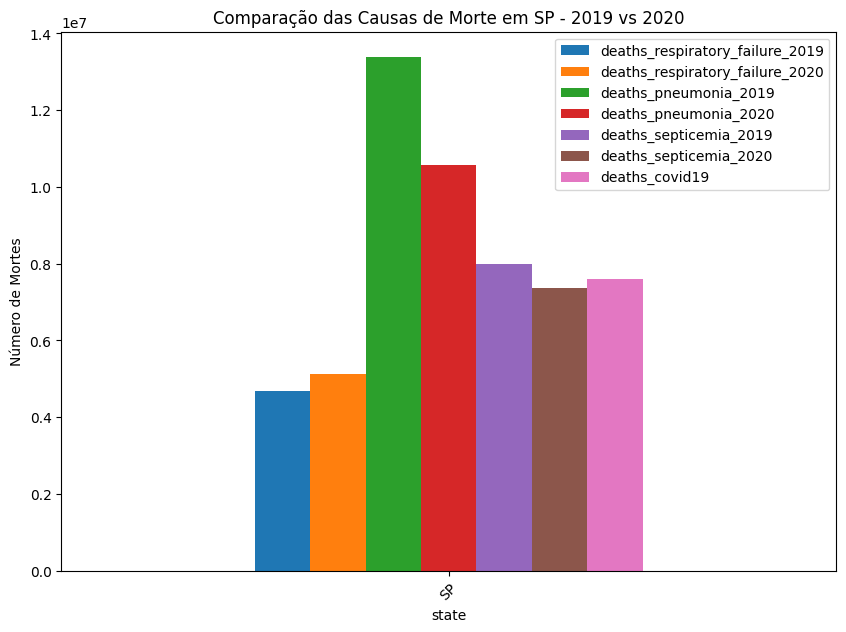

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregando os dados
df = pd.read_csv('obito_cartorio.csv')

# Agrupando os dados por estado e somando as mortes por cada causa em 2019 e 2020
mortes_por_causa = df.groupby('state').agg({
    'deaths_respiratory_failure_2019': 'sum',
    'deaths_respiratory_failure_2020': 'sum',
    'deaths_pneumonia_2019': 'sum',
    'deaths_pneumonia_2020': 'sum',
    'deaths_septicemia_2019': 'sum',
    'deaths_septicemia_2020': 'sum',
    'deaths_covid19': 'sum'
}).reset_index()

# Selecionando um estado para análise detalhada (exemplo: 'SP')
estado_selecionado = 'SP'
dados_estado = mortes_por_causa[mortes_por_causa['state'] == estado_selecionado]

# Plotando as comparações das causas de morte entre 2019 e 2020
dados_estado.plot(kind='bar', x='state', figsize=(10, 7))
plt.title(f'Comparação das Causas de Morte em {estado_selecionado} - 2019 vs 2020')
plt.ylabel('Número de Mortes')
plt.xticks(rotation=45)
plt.show()

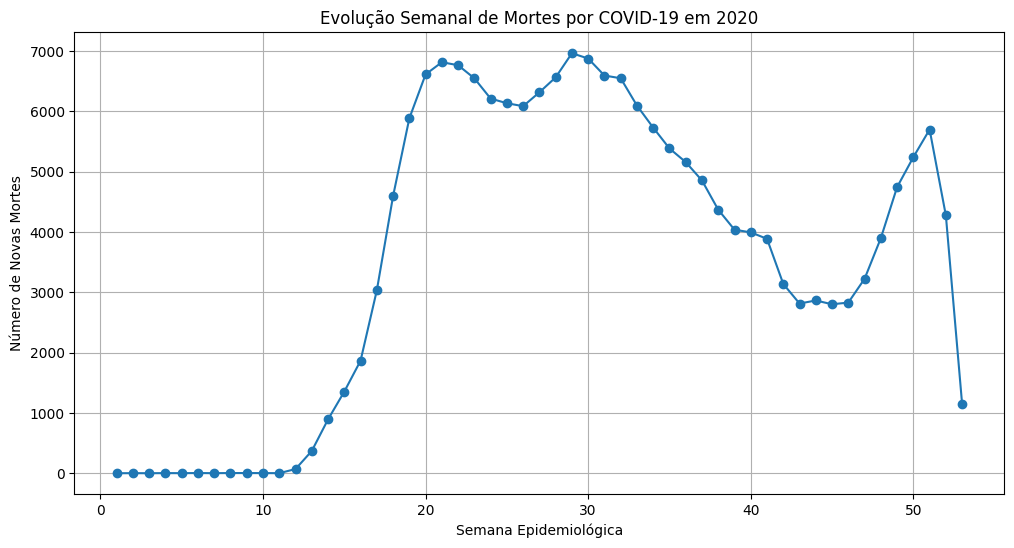

In [17]:
# Convertendo a coluna 'date' para datetime
df['date'] = pd.to_datetime(df['date'])

# Agrupando os dados por semana epidemiológica de 2020 e somando as novas mortes por COVID-19
mortes_covid_semanal = df.groupby('epidemiological_week_2020')['new_deaths_covid19'].sum().reset_index()

# Plotando a evolução semanal de mortes por COVID-19
plt.figure(figsize=(12, 6))
plt.plot(mortes_covid_semanal['epidemiological_week_2020'], mortes_covid_semanal['new_deaths_covid19'], marker='o', linestyle='-')
plt.title('Evolução Semanal de Mortes por COVID-19 em 2020')
plt.xlabel('Semana Epidemiológica')
plt.ylabel('Número de Novas Mortes')
plt.grid(True)
plt.show()

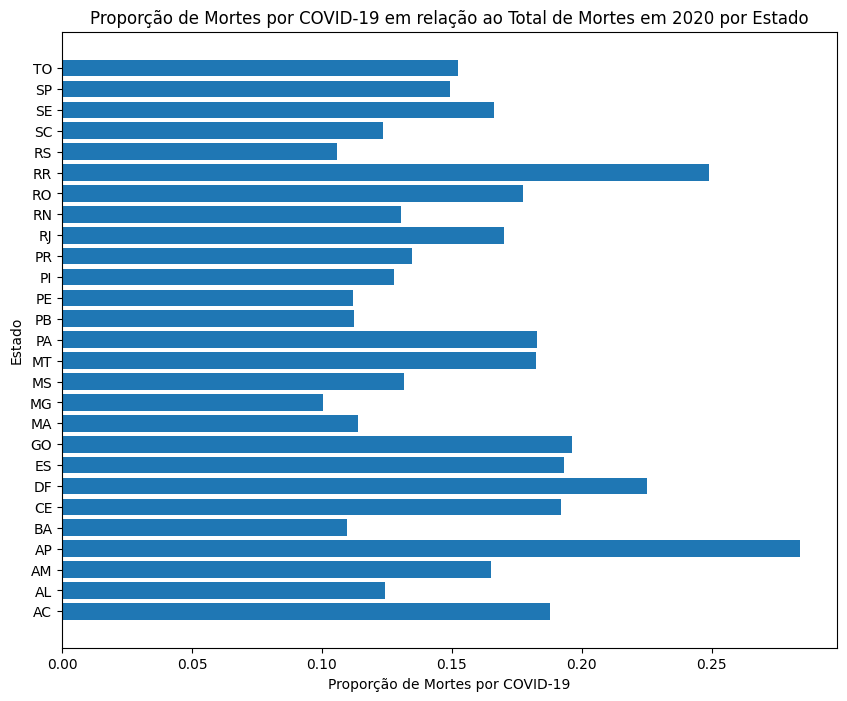

In [19]:
# Calculando o total de mortes em 2019 e 2020 por estado
total_mortes_2019_2020 = df.groupby('state').agg({
    'new_deaths_total_2019': 'sum',
    'new_deaths_total_2020': 'sum',
    'new_deaths_covid19': 'sum'
}).reset_index()

# Calculando a proporção de mortes por COVID-19 em relação ao total de mortes em 2020
total_mortes_2019_2020['proporcao_covid19'] = total_mortes_2019_2020['new_deaths_covid19'] / total_mortes_2019_2020['new_deaths_total_2020']

# Plotando a proporção de mortes por COVID-19 por estado
plt.figure(figsize=(10, 8))
plt.barh(total_mortes_2019_2020['state'], total_mortes_2019_2020['proporcao_covid19'])
plt.xlabel('Proporção de Mortes por COVID-19')
plt.ylabel('Estado')
plt.title('Proporção de Mortes por COVID-19 em relação ao Total de Mortes em 2020 por Estado')
plt.show()